# Assignment 2
## Due May 2nd

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances
#test

# Exercise 1

Here we define the function that will generate our data

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

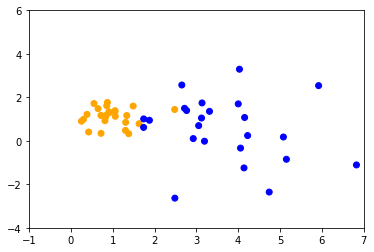

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset

In [5]:
test_n1, test_n2 = 100, 100

# call the test data and labels test_data and test_label respectively
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

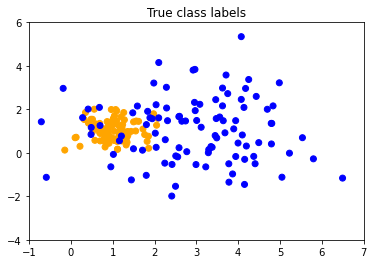

In [6]:
fig = plt.figure()
plt.title("True class labels")
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$

In [7]:
def knnClassify(train_data, train_labels, test_data, k=1):

    distances_to_testsamp = euclidean_distances(test_data, train_data) #shape n_testsamp * n_trainsamp
    k_nearest_neighbors_idx = np.argsort(distances_to_testsamp,axis=1)[:,:k] #sort train samples by distance to each test sample
    k_nearest_neighbors_labels = train_labels[k_nearest_neighbors_idx] #assign labels to the k nearest neighbors
    majority_vote = np.zeros(k_nearest_neighbors_labels.shape[0]) #find majority class label for each test sample
    for sampidx in range(k_nearest_neighbors_labels.shape[0]):
        (labels, counts) = np.unique(k_nearest_neighbors_labels[sampidx,:], return_counts=True)
        majority_vote[sampidx] = labels[np.argmax(counts)]
    
    return majority_vote



In [8]:
pred_labels = knnClassify(train_data, train_labels, test_data, 3)


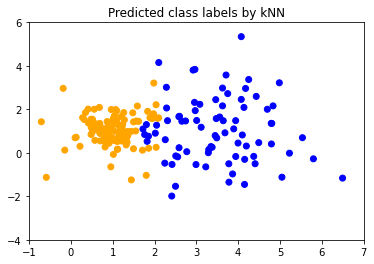

In [9]:
fig = plt.figure()
plt.title('Predicted class labels by kNN')
color = ['orange' if l == 1 else 'blue' for l in pred_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()


## c)

### Write your expectations for the results here
*Errors will occur primarily in atypical / outlier points, e.g., points from one category that lie in the part of the space that is primarily dominated by the other category.*

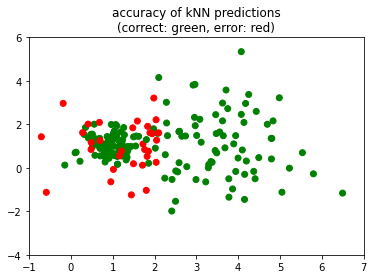

In [10]:
correct_preds = (test_labels == pred_labels)

fig = plt.figure()
plt.title("accuracy of kNN predictions\n(correct: green, error: red)")
color = ['green' if correct else 'red' for correct in correct_preds]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

### Comment
*The plot confirms the intuition explained above. All misclassified (red) points are blue points that lie in the part of the space primarily populated by the yellow cluster.*

## d)

define the empirical risk with 0-1-loss

In [11]:
def empRiskWith01loss(test_labels, pred_labels):
    loss = sum(test_labels != pred_labels)/len(pred_labels) #set loss to 1 if prediction is false, 0 otherwise, return mean loss
    return loss

In [12]:
empRiskWith01loss(test_labels, pred_labels)

0.155

Compute the risk for various k and plot it

Text(0, 0.5, 'empirical 0-1 loss')

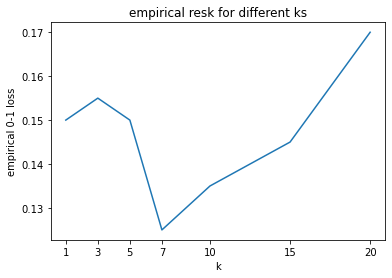

In [13]:
ks = [1, 3, 5, 7, 10, 15, 20]

pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical resk for different ks")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

### Which value of k would you use?

*7*

### e)

In [14]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

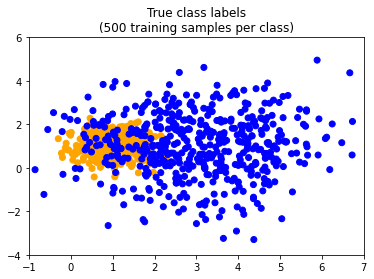

In [15]:
# plot the points with color dependent on class
fig = plt.figure()
plt.title("True class labels\n(500 training samples per class)")
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Text(0, 0.5, 'empirical 0-1 loss')

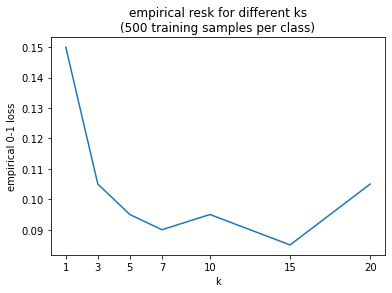

In [16]:
# plot the 01 emprirical risk for different values of k and n_test

#I don't get this, the task says that we are supposed to generate a 
#new *training* set with 500 samples per class, but here it says we 
#should generate test sets of different size...

ks = [1, 3, 5, 7, 10, 15, 20]
n_test_list = [100,250,500,750,1001,1500]



pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical resk for different ks\n(500 training samples per class)")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

### Which k performs best in this case? If it changed, can you explain why?

Now 15 is the best-performing k. Since more training data is available now, the chances that the k nearest neighbors belong to the "right" class (i.e., the class that populates a given area of the feature space) have increased for a given k.

### f)

In [17]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)


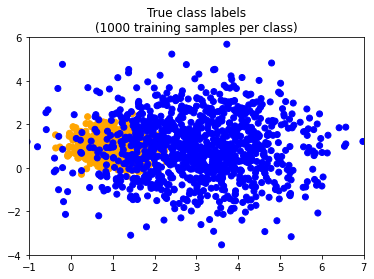

In [18]:
# plot the points with color dependent on class
# plot the points with color dependent on class
fig = plt.figure()
plt.title("True class labels\n(1000 training samples per class)")
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Text(0, 0.5, 'empirical 0-1 loss')

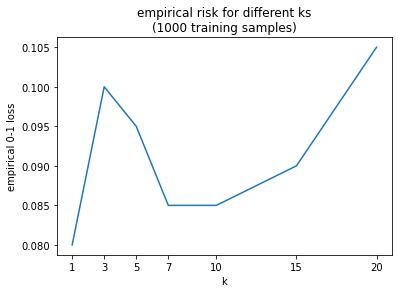

In [19]:
# plot the 01 emprirical risk for different values of k
ks = [1, 3, 5, 7, 10, 15, 20]



pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical risk for different ks\n(1000 training samples)")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

### Comment

now k=1 seems to be optimal. This could be due to the fact that the data are sampled more densely now, so the chance that the single nearest neighbor belongs to the right cluster has increased.

# Exercise 2
Load data and show one class

In [20]:
train_df = pd.read_csv('train_USPS.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).values
train_labels = train_df['Label'].values
test_df = pd.read_csv('test_USPS.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).values
test_labels = test_df['Label'].values

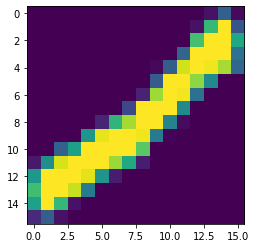

In [21]:
_ = plt.imshow(train_data[3].reshape(16,16))

## a)

Find out if the dataset is balanced

*Yes, it is. The training set contains 1000 samples per class, the test set 100 samples per class.*

In [22]:
# find proportion of labels in training set
trainlabels, labelcount = np.unique(train_labels, return_counts=True)
for label, count in zip(trainlabels, labelcount):
    print(f'class {label}: {count} samples')


class 0: 1000 samples
class 1: 1000 samples
class 2: 1000 samples
class 3: 1000 samples
class 4: 1000 samples
class 5: 1000 samples
class 6: 1000 samples
class 7: 1000 samples
class 8: 1000 samples
class 9: 1000 samples


In [23]:
# find proportion of labels in test set
testlabels, labelcount = np.unique(test_labels, return_counts=True)
for label, count in zip(testlabels, labelcount):
    print(f'class {label}: {count} samples')


class 0: 100 samples
class 1: 100 samples
class 2: 100 samples
class 3: 100 samples
class 4: 100 samples
class 5: 100 samples
class 6: 100 samples
class 7: 100 samples
class 8: 100 samples
class 9: 100 samples


## b)

Compute knn for the USPS dataset

In [24]:
%%time

pred_labels = knnClassify(train_data, train_labels, test_data)

CPU times: user 1.09 s, sys: 44.9 ms, total: 1.14 s
Wall time: 877 ms


Text(0, 0.5, 'empirical 0-1 loss')

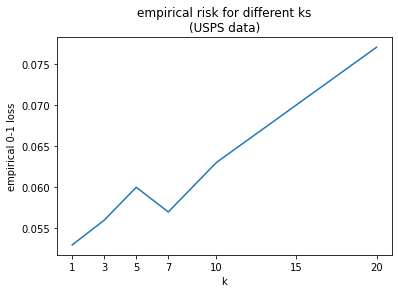

In [25]:
ks = [1, 3, 5, 7, 10, 15, 20]

pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical risk for different ks\n(USPS data)")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

# Exercise 3
## a)
Based on the maximum likelihood principle, one predicts winter if $P(T=t|winter) > P(T=t|summer)$ and summer if it is the other way round.

## b)

$P(winter|T=t) = \frac{P(T=t|winter)*p(winter)}{p(T=t)} = \frac{P(T=t|winter)*p(winter)}{P(T=t|winter)*p(winter)+P(T=t|\neg winter)*P(\neg winter)}; \quad P(winter) = p(\neg winter) = 0.5$

$P(summer|T=t) = \frac{P(T=t|summer)*p(summer)}{p(T=t)} = \frac{P(T=t|summer)*p(summer)}{P(T=t|summer)*p(summer)+P(T=t|\neg summer)*P(\neg summer)}; \quad P(summer) = p(\neg summer) = 0.5$ 

$f_{Bayes} =    \begin{cases}
                winter,& \text{if } P(winter|T=t) > P(summer|T=t)\\
                summer,& \text{otherwise}
                \end{cases}
$

the same formulas apply if $P(Summer) = 0.8, P(Winter) = 0.2$.

# Exercise 4

## a)
Since S is finite and $h_S(x) = y_i$ for all $x_i$ in the set, the prediction made by $h_S(x) = \hat{y}$ will always be identical to $y_i$. Hence $S: h(x_i) \neq y_i = \emptyset \implies L_S(h) = 0 \quad \forall S$.

## b) 
If the $x_i$ are sampled from the uniform distribution on the squared interval $[-2,2]^2$, and correct labels "1" are assigned to the interval $[-1,1]^2$, $\frac{1}{4}$ of the samples will be assigned the label "1" ($2^2 / 4^2 = \frac{1}{4}$). Since the classifier has merely memorized the training samples, but has not learned any underlying function for unseen samples, it will have no information as to which label to predict. It will, therefore, predict the most frequent class label ("0") by default for unseen data. This prediction will be wrong in $\frac{1}{4}$ of cases, which will be the true risk of the classifier.


## c)
Considering an example set for n = 3: $S = {(x_1, 1), (x_2, 0), (x_3, 1)}; \quad x_1, x_2, x_3 \in \mathbb{N}$, finding a polynomial $p_{S_1}(x) \geq 0 \quad \forall x \in S_1$ is equivalent to solving the linear equation system:


$a_0 + a_1 x_1 + a_2 x_1^2 + a_3 x_1^3 \geq 0$

$a_0 + a_1 x_2 + a_2 x_2^2 + a_3 x_2^3 \leq 0$

$a_0 + a_1 x_3 + a_2 x_3^2 + a_3 x_3^3 \geq 0$.

It is known that a polynomial satisfying these equations always exists, given that the degree of the polynomial i is greater or equal to the number of samples n (Lagrange polynomial).

The existence of such a polynomial can be shown by defining a polynomial with roots at all $x_i \in S_1$, where each root is also a local maximum. This polynomial can be defined as:

$p_{S_1} = -(x-x_1)^2 (x-x^2)^2 ... (x-x_n)^2$. This polynomial always exists for $x_i \in \mathbb{R}$, and it can be easily shown that it fulfils the above requirements.

## d)

Using a polynomial with a lower degree $N << n$ will decrease overfitting.


